# Q13 - Polynomial Regression
_Ch 03 - Linear Regression  
Q13 (applied)_

<a id='index'></a>
### Index
- [Load packages](#Load-packages)
- [a) Simulate X](#a%29-Simulate-X)
- [b) Simulate noise](#b%29-Simulate-noise)
- [c) Generate model](#c%29-Generate-model)
- [d) Scatterplot](#d%29-Scatterplot)
- [e) Least squares model](#e%29-Least-squares-model)
- [f) Regression lines](#f%29-Regression-lines)
- [g) Quadratic model](#g%29-Quadratic-model)
- [h) Reduced noise](#h%29-Reduced-noise)
- [i) Increased noise](#i%29-Increased-noise)
- [j) Confidence levels of coefficients](#j%29-Confidence-levels-of-coefficients)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
sns.set_style(rc={'figure.facecolor':'w'})

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## Q13
In this exercise you will create some simulated data and will fit simple linear regression models to it. Set seed to 1 prior to starting part (a) to ensure consistent results.

### a) Simulate X
Create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.

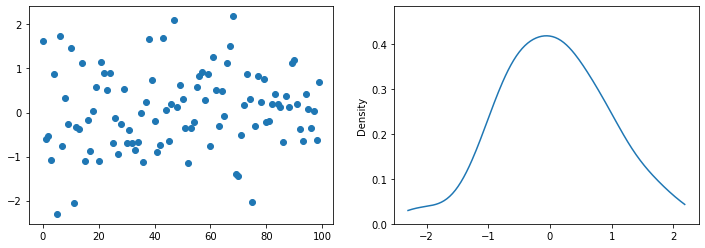

In [3]:
# N(0, 1) >> normally distribution with mean = 0 , variance = 1
np.random.seed(1)
x = np.random.normal(size=100)

f, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].scatter(range(len(x)), x)
plt.subplot(122)
sns.histplot(x=x, stat='density', kde=True, linewidth=0, fill=False);

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### b) Simulate noise
Create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

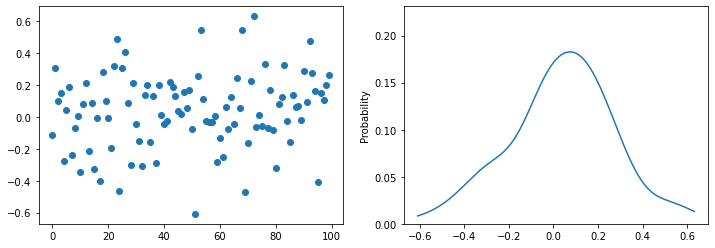

In [4]:
eps = np.random.normal(loc=0, scale=0.25, size=100)

f, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].scatter(range(len(eps)), eps)
plt.subplot(122)
sns.histplot(x=eps, kde=True, stat='probability', fill=False, linewidth=0);

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### c) Generate model
Using x and eps, generate a vector y according to the model &ensp;  $Y = -1 + 0.5X + \epsilon$  
What is the length of the vector y? What are the values of $\beta_0$ and $\beta_1$ in this linear model?

In [5]:
y = -1 + 0.5*x + eps
len(y)

100

$\beta_0 = -1\quad \beta_1 = 0.5$

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### d) Scatterplot
Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

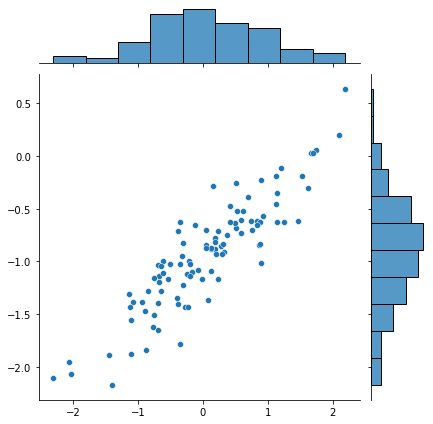

In [6]:
sns.jointplot(x=x, y=y);

<div class="alert alert-block alert-info">
A strong positive linear relationship is apparent between the variables.<br>
The model was built using -1 as the constant. It can be seen in the intercept (value of y when x = 0), appearing to average out around y = -1.
</div>

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### e) Least squares model
Fit a least squares linear model to predict y using x. Comment on the model obtained. How do $\hat\beta_0$ and $\hat\beta_1$ compare to $\beta_0$ and $\beta_1$?

In [7]:
reg1 = smf.ols("y ~ x", data=pd.DataFrame({'y':y, 'x':x})).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           5.39e-36
Time:                        00:48:54   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9632      0.023    -40.999      0.000      -1.010      -0.917
x              0.5239      0.026     19.783      0.000       0.471       0.576
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-info">
$\beta_0 = -1\quad\quad\quad \beta_1 = 0.5$<br>
$\hat\beta_0 = -0.9632 \quad \hat\beta_1 = 0.5239$<br>

The estimated coefficients are very close to the true coefficient values.
</div>

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### f) Regression lines
Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. 

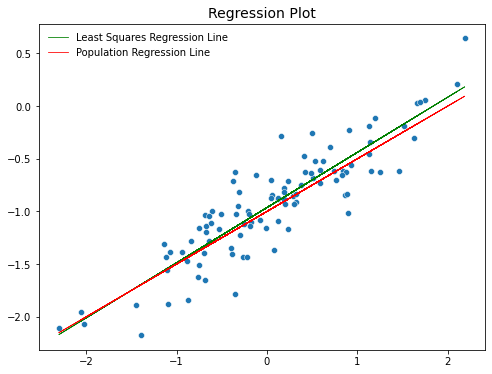

In [8]:
f, axs = plt.subplots(1,1, figsize=(8,6))
sns.scatterplot(x=x, y=y).set_title('Regression Plot', fontsize=14)
plt.plot(x, reg1.fittedvalues, color='g', lw=0.8)
plt.plot(x, (-1 + 0.5*x), color='r', lw=0.8)
plt.legend(['Least Squares Regression Line', 'Population Regression Line'], frameon=False);

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### g) Quadratic model
Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [9]:
reg2 = smf.ols('y ~ x + np.square(x)', data=pd.DataFrame({'y':y, 'x':x})).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           1.32e-34
Time:                        00:48:54   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9663      0.029    -33.486      0.000      -1.024      -0.909
x                0.5234      0.027     19.582      0.000       0.470       0.576
np.square(x)     0.0039      0.021      0.181      0.856      -0.038       0.046
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
print(f'rse = {round(np.sqrt(reg1.scale), 4)}')
print(f'rse = {round(np.sqrt(reg2.scale), 4)}')

rse = 0.2344
rse = 0.2356


<a id=''></a><div class="alert alert-block alert-info">
<h5>Observations</h5><br>
The coefficient for x has reduced minutely (by 0.0005) in the polynomial model.<br>
The quadratic term has turned out to be statistically insignificant as the p-value for $x^2$ is far larger (0.856) than the traditional level of significance of 5%.<br>
Had it been statistically significant, we would have compared the $Adj. R^2$ scores of the 2 models to judge there efficacy. <br>
Despite adding the quadratic term, $R^2$ value of both models is the same. and the $Adj. R^2$ value of the polynomial model is marginally lower than that of the simple linear model. The quadratic term has not improved the model.
</div>

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### h) Reduced noise
Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

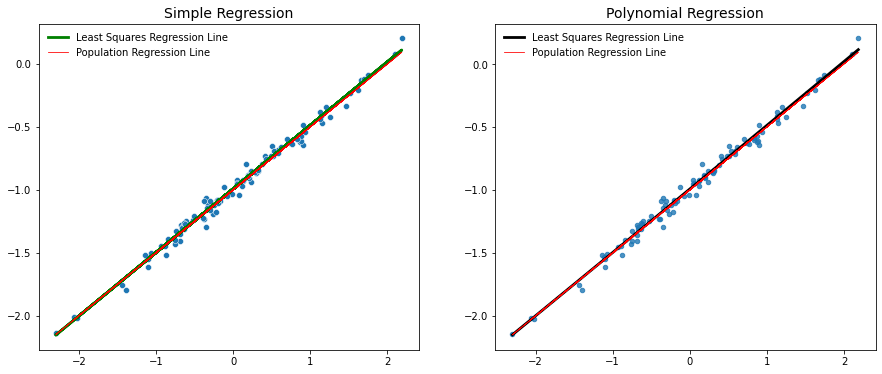

In [11]:
np.random.seed(1)
x = np.random.normal(size=100)
eps = np.random.normal(loc=0, scale=0.05, size=100)
y = -1 + 0.5*x + eps
df = pd.DataFrame({'y':y, 'x':x})

reg3 = smf.ols('y ~ x', data=df).fit()
reg4 = smf.ols('y ~ x + np.square(x)', data=df).fit()

f, axs = plt.subplots(1,2, figsize=(15,6))
sns.scatterplot(x=x, y=y,  ax=axs[0]).set_title('Simple Regression', fontsize=14)
axs[0].plot(x, reg3.fittedvalues, color='g', lw=2.8)
axs[0].plot(x, (-1 + 0.5*x), color='r', lw=0.8)
axs[0].legend(['Least Squares Regression Line', 'Population Regression Line'], frameon=False)

axs[1].use_sticky_edges = False
sns.regplot(x=x, y=y, order=2, ci=False, line_kws={'color':'k', 'lw':2.8}, scatter_kws={'s':20})
axs[1].set_title('Polynomial Regression', fontsize=14)
axs[1].plot(x, (-1 + 0.5*x), color='r', lw=0.8)
axs[1].legend(['Least Squares Regression Line', 'Population Regression Line'], frameon=False);

<div class="alert alert-block alert-info">
The least square regression lines for both simple and quadratic models are almost collinear with the population regression line and, concomittantly, with each other.
</div>

In [12]:
print(f'rsq = {round(reg3.rsquared, 4)}, adj_rsq = {round(reg3.rsquared_adj, 4)}')
print(f'rse = {round(np.sqrt(reg3.scale), 4)}')
reg3.summary().tables[1]

rsq = 0.9893, adj_rsq = 0.9892
rse = 0.0469


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.9926,0.005,-211.252,0.000,-1.002,-0.983
x,0.5048,0.005,95.309,0.000,0.494,0.515


In [13]:
print(f'rsq = {round(reg4.rsquared, 4)}, adj_rsq = {round(reg4.rsquared_adj, 4)}')
print(f'rse = {round(np.sqrt(reg4.scale), 4)}')
reg4.summary().tables[1]

rsq = 0.9893, adj_rsq = 0.9891
rse = 0.0471


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.9933,0.006,-172.106,0.000,-1.005,-0.982
x,0.5047,0.005,94.408,0.000,0.494,0.515
np.square(x),0.0008,0.004,0.181,0.856,-0.008,0.009


<a id=''></a><div class="alert alert-block alert-info">
<h5>Observations</h5><br>
    <b>New v Old</b><br>
    - $R^2$ values of the models (simple as well as polynomial) fitted on the less variable dataset have increased considerably from that of the previous dataset (0.9893 v 0.8).<br>
    - Residual standard errors have reduced, as expected, with decrease in noise.<br>
    - $\hat\beta_x$ = 0.5048 has come a lot closer to the true $\beta_x$ = 0.5.<br>
    - tstat (0.181) and p-value (0.856) of the quadratic term for the new dataset is same as the old one.<br><br>
    <b>Simple model vs Quadratic model for new data</b><br>
    - Quadratic term is still insignificant.<br>
    - $R^2$ and $Adj. R^2$ values for both models are effectively equivalent.<br>
    - Quadratic term has not brought any imporvements in the model. 
</div>

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### i) Increased noise
Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

<b>Answer:</b><br>
Increasing the noise by a factor of 4, sd = 1.

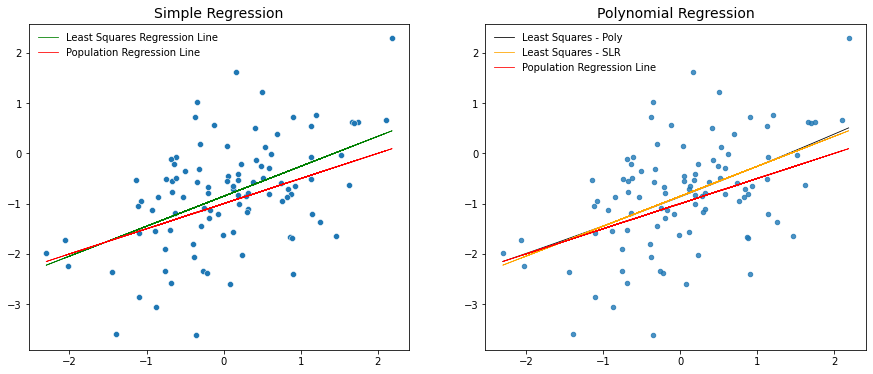

In [14]:
np.random.seed(1)
x = np.random.normal(size=100)
eps = np.random.normal(loc=0, scale=1, size=100)
y = -1 + 0.5*x + eps
df = pd.DataFrame({'y':y, 'x':x})

reg5 = smf.ols('y ~ x', data=df).fit()
reg6 = smf.ols('y ~ x + np.square(x)', data=df).fit()

f, axs = plt.subplots(1,2, figsize=(15,6))
sns.scatterplot(x=x, y=y,  ax=axs[0]).set_title('Simple Regression', fontsize=14)
axs[0].plot(x, reg5.fittedvalues, color='g', lw=0.8)
axs[0].plot(x, (-1 + 0.5*x), color='r', lw=0.8)
axs[0].legend(['Least Squares Regression Line', 'Population Regression Line'], frameon=False)

axs[1].use_sticky_edges = False
sns.regplot(x=x, y=y, order=2, ci=False, line_kws={'color':'k', 'lw':0.8}, scatter_kws={'s':20})
axs[1].set_title('Polynomial Regression', fontsize=14)
axs[1].plot(x, reg5.fittedvalues, color='orange', lw=0.8)
axs[1].plot(x, (-1 + 0.5*x), color='r', lw=0.8)
axs[1].legend(['Least Squares - Poly', 'Least Squares - SLR', 'Population Regression Line'], 
              frameon=False);

<div class="alert alert-block alert-info">
We can see a wider divergence between the slope of the least square regression line (for both simple and quadratic models) and the population regression line.<br>
But the least squares line for the simple model and quadratic model seem to be very close in slope.
</div>

In [15]:
print(f'rsq = {round(reg5.rsquared, 4)}, adj_rsq = {round(reg5.rsquared_adj, 4)}')
print(f'rse = {round(np.sqrt(reg5.scale), 4)}')
reg5.summary().tables[1]

rsq = 0.2438, adj_rsq = 0.2361
rse = 0.9376


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.8530,0.094,-9.076,0.000,-1.039,-0.666
x,0.5954,0.106,5.621,0.000,0.385,0.806


In [16]:
print(f'rsq = {round(reg6.rsquared, 4)}, adj_rsq = {round(reg6.rsquared_adj, 4)}')
print(f'rse = {round(np.sqrt(reg6.scale), 4)}')
reg6.summary().tables[1]

rsq = 0.2441, adj_rsq = 0.2285
rse = 0.9422


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.8650,0.115,-7.494,0.000,-1.094,-0.636
x,0.5936,0.107,5.552,0.000,0.381,0.806
np.square(x),0.0154,0.085,0.181,0.856,-0.153,0.184


<a id=''></a><div class="alert alert-block alert-info">
<h5>Observations</h5><br>
    <b>New v Old</b><br>
    - Both new models (simple as well as polynomial) fit the noisier dataset quite poorly. The $R^2$ values have reduced to the levels around 0.2438 from the original 0.8 of the dataset with eps sd = 0.25.<br>
    - Residual standard errors have risen compared with the orginal (0.2344) by a factor of 4 (0.9376/0.2344) to 0.9376, with increase in noise.<br>
    - $\hat\beta_x$ = 0.5954 (simple) is farther from the true $\beta_x$ = 0.5.<br>
    - Notably, tstat (0.181) and p-value (0.856) of the quadratic term for the new dataset is still the same as the previous 2 versions. Though, the $\hat\beta$ is not the same.<br><br>
    <b>Simple model vs Quadratic model for new data</b><br>
    - Quadratic term is still insignificant.<br>
    - $R^2$ for the quadratic model has minutely increased while the $Adj. R^2$ value has marginally decreased. Both scores for both models are still effectively equivalent.<br>
    - Quadratic term has still not proven useful.
</div>

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### j) Confidence levels of coefficients
What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [17]:
print(' '*35,'\033[1m','Simple model','\033[0m')
print('sd = 0.25\n', reg1.summary().tables[1], sep='')
print('\nsd = 0.05\n', reg3.summary().tables[1], sep='')
print('\nsd = 1\n', reg5.summary().tables[1], sep='')
print('\n\n',' '*35,'\033[1m','Quadratic model','\033[0m')
print('sd = 0.25\n', reg2.summary().tables[1], sep='')
print('\nsd = 0.05\n', reg4.summary().tables[1], sep='')
print('\nsd = 1\n', reg6.summary().tables[1], sep='')

                                     Simple model 
sd = 0.25
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9632      0.023    -40.999      0.000      -1.010      -0.917
x              0.5239      0.026     19.783      0.000       0.471       0.576

sd = 0.05
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9926      0.005   -211.252      0.000      -1.002      -0.983
x              0.5048      0.005     95.309      0.000       0.494       0.515

sd = 1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8530      0.094     -9.076      0.000      -1.039      -0.666
x              0.5954      0.106      5.621      0.

<a id=''></a><div class="alert alert-block alert-info">
<h5>Observations</h5><br>
    - Confidence intervals are narrower when noise has less variance.
</div>

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## References

https://www.kaggle.com/lmorgan95/islr-linear-regression-ch-3-solutions  
https://botlnec.github.io/islp/sols/chapter3/exercise11/

[go to toc](#index)

<b> &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;-------------------------------------------- &ensp; <i>That's All Folks!</i> &ensp; --------------------------------------------</b>